In [1]:
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D,Input
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD
from keras.callbacks import CSVLogger

Using TensorFlow backend.


import urllib
proxy_support = urllib.request.ProxyHandler({'https': 'http://proxy.hogehoge.ac.jp:80'})
opener = urllib.request.build_opener(proxy_support)
urllib.request.install_opener(opener)

In [27]:
n_categories=5
batch_size=32
train_dir='C:/Users/0030602/Desktop/VGG16-master/madoka_magica/madoka_magica_images/train'
validation_dir='C:/Users/0030602/Desktop/VGG16-master/madoka_magica/madoka_magica_images/validation'
file_name='vgg16_madomagi_fine'

In [28]:
import os
os.chdir('C:/Users/0030602/Desktop/VGG16-master/madoka_magica/')
os.environ["https_proxy"] = "http://172.23.110.249:8080"

In [51]:
base_model=VGG16(weights='vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5',include_top=False,input_tensor=Input(shape=(224,224,3)))

In [52]:
#add new layers instead of FC networks
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x)
prediction=Dense(n_categories,activation='softmax')(x)
model=Model(inputs=base_model.input,outputs=prediction)

In [53]:
#fix weights before VGG16 14layers
for layer in base_model.layers[:15]:
    layer.trainable=False

model.compile(optimizer=SGD(lr=0.0001,momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [70]:
base_model=VGG16(weights='vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5',include_top=False,
                 input_tensor=Input(shape=(224,224,3)))

In [71]:
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x)
prediction=Dense(n_categories,activation='softmax')(x)
model=Model(inputs=base_model.input,outputs=prediction)

In [72]:
for layer in base_model.layers[:15]:
    layer.trainable=False

In [73]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [58]:
train_datagen=ImageDataGenerator(
    rescale=1.0/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [67]:
validation_datagen=ImageDataGenerator(rescale=1.0/255)

Found 250 images belonging to 5 classes.


In [ ]:
train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

In [68]:
validation_generator=validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(224,224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

Found 150 images belonging to 5 classes.


In [76]:
validation_generator

In [77]:
hist=model.fit_generator(train_generator,epochs=200,verbose=1,validation_data=validation_generator)

Epoch 1/200
8/8 [==============================] - 143s 18s/step - loss: 55.1602 - accuracy: 0.1840 - val_loss: 1.6083 - val_accuracy: 0.1933
Epoch 2/200
8/8 [==============================] - 140s 17s/step - loss: 1.6114 - accuracy: 0.1880 - val_loss: 1.6119 - val_accuracy: 0.2000
Epoch 3/200
8/8 [==============================] - 140s 18s/step - loss: 1.6094 - accuracy: 0.1960 - val_loss: 1.6145 - val_accuracy: 0.2067
Epoch 4/200
8/8 [==============================] - 144s 18s/step - loss: 1.6097 - accuracy: 0.1840 - val_loss: 1.6093 - val_accuracy: 0.2267
Epoch 5/200
8/8 [==============================] - 139s 17s/step - loss: 1.6101 - accuracy: 0.2360 - val_loss: 1.6238 - val_accuracy: 0.2000
Epoch 6/200
8/8 [==============================] - 139s 17s/step - loss: 1.6114 - accuracy: 0.1920 - val_loss: 1.6145 - val_accuracy: 0.1867
Epoch 7/200
8/8 [==============================] - 139s 17s/step - loss: 1.6081 - accuracy: 0.2000 - val_loss: 1.6271 - val_accuracy: 0.2400
Epoch 8/200


In [78]:

#save weights
model.save('magi.h5')


In [79]:
from keras.models import model_from_json
import matplotlib.pyplot as plt
import numpy as np
import os,random
from keras.preprocessing.image import img_to_array, load_img
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD


In [80]:
batch_size=32
file_name='vgg16_madomagi_fine'
test_dir='madoka_magica_images/test'
display_dir='madoka_magica_images/display'
label=['homura','kyoko','madoka','mami','sayaka']

In [81]:
#load model and weights
json_string=open(file_name+'.json').read()
model=model_from_json(json_string)
model.load_weights('magi.h5')

In [84]:
model.compile(optimizer=SGD(lr=0.0001,momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [85]:
#data generate
test_datagen=ImageDataGenerator(rescale=1.0/255)

In [86]:
test_generator=test_datagen.flow_from_directory(
    test_dir,
    target_size=(224,224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

Found 412 images belonging to 5 classes.


In [87]:
#evaluate model
score=model.evaluate_generator(test_generator)
print('\n test loss:',score[0])
print('\n test_acc:',score[1])


 test loss: 2.7725160121917725

 test_acc: 0.8422330021858215


In [88]:
#predict model and display images
files=os.listdir(display_dir)
img=random.sample(files,25)

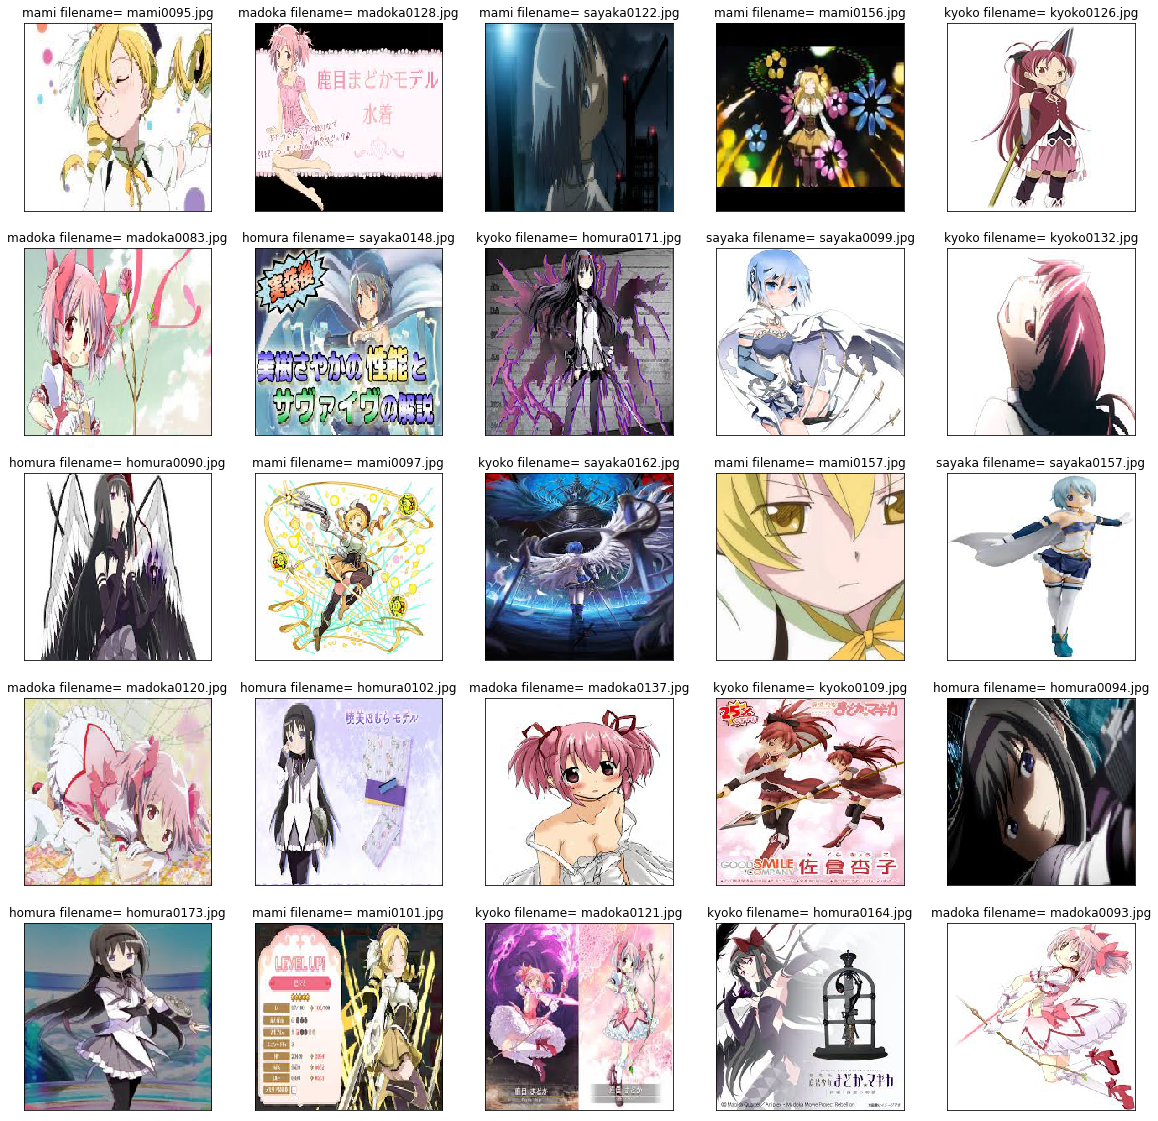

In [93]:
plt.figure(figsize=(20,20))
for i in range(25):
    temp_img=load_img(os.path.join(display_dir,img[i]),target_size=(224,224))
    plt.subplot(5,5,i+1)
    plt.imshow(temp_img)
    #Images normalization
    temp_img_array=img_to_array(temp_img)
    temp_img_array=temp_img_array.astype('float32')/255.0
    temp_img_array=temp_img_array.reshape((1,224,224,3))
    #predict image
    img_pred=model.predict(temp_img_array)
    plt.title(label[np.argmax(img_pred)]+' filename= '+str(img[i]))
    #eliminate xticks,yticks
    plt.xticks([]),plt.yticks([])
    
plt.show()